Walmart

In this project, weekly sales data from Walmart stores were analyzed to identify the key factors influencing sales performance. After data cleaning and preprocessing, several variables—including holidays, discount strategies (MarkDown), temperature, store size, and fuel price—were examined to uncover sales patterns and derive actionable business insights.

فراخوانی فایلcsv(Import)


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
try:
  df_Features = pd.read_csv('Features data set.csv',
                            encoding="utf-8",
                            sep=",")
  df_sales = pd.read_csv('sales data-set.csv',
                         encoding="utf-8",
                         sep=",")
  df_stores = pd.read_csv('stores data-set.csv',
                          encoding="utf-8",
                          sep=",")
except Exception as e:
  print(f"cant read the file {e}")
except FileNotFoundError:
  print("cant find the file")

بررسی اولیه(Check)

In [44]:
df_Features.head(2)
df_Features.info()
df_Features.describe(include="all")
df_Features.tail(3)
df_Features.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
7648,43,05/03/2010,53,3,NaN,NaN,NaN,NaN,NaN,203,10,False
2445,14,12/08/2011,77,4,NaN,NaN,NaN,NaN,NaN,186,9,False
7829,44,26/02/2010,30,3,NaN,NaN,NaN,NaN,NaN,127,8,False


In [45]:
df_sales.head(2)
df_sales.info()
df_sales.describe(include="all")
df_sales.tail(3)
df_sales.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


,Store,Dept,Date,Weekly_Sales,IsHoliday
247449,26,4,18/05/2012,"24,178",False
168696,18,10,26/08/2011,"15,646",False
362896,39,13,27/01/2012,"52,479",False


In [46]:
df_stores.head(2)
df_stores.info()
df_stores.describe(include="all")
df_stores.tail(3)
df_stores.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


,Store,Type,Size
20,21,B,140167
1,2,A,202307
24,25,B,128107


یکی کردن فایل ها(Marge)

In [47]:
marge = pd.merge(df_sales, df_Features, on=['Store', 'Date', 'IsHoliday'], how='inner')
df = pd.merge(marge, df_stores, on='Store', how="left")
print(len(df))

421570


In [48]:
df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,"24,924",False,42,3,NaN,NaN,NaN,NaN,NaN,211,8,A,151315
1,1,1,12/02/2010,"46,039",True,39,3,NaN,NaN,NaN,NaN,NaN,211,8,A,151315


In [49]:
df.describe(include="all")
df.sample(3)
df.tail(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


مقادیر خالی(NaN)

In [50]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [51]:
df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)
df.head(2)
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

مقادیر غیر منطقی(Irrational values)

In [52]:
df = df[df["Store"].between(1, 45)]
print(len(df))

421570


In [53]:
df = df[df["Weekly_Sales"] >= 0]
print(len(df))

420285


In [54]:
df = df[df["Fuel_Price"].between(1, 10)]
print(len(df))

420285


In [55]:
df = df[(df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] >= 0).all(axis=1)]
print(len(df))

418727


In [56]:
df = df[df["CPI"] > 0]
print(len(df))

418727


In [57]:
df = df[df["Unemployment"].between(0, 30)]
print(len(df))

418727


In [58]:
df = df[df["Type"].isin(["A", "B", "C"])]
print(len(df))

418727


In [59]:
df = df[df["Size"] > 0]
print(len(df))

418727


(Type Of Data)نوع داده ها

In [60]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
Index: 418727 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         418727 non-null  int64         
 1   Dept          418727 non-null  int64         
 2   Date          166938 non-null  datetime64[ns]
 3   Weekly_Sales  418727 non-null  float64       
 4   IsHoliday     418727 non-null  bool          
 5   Temperature   418727 non-null  float64       
 6   Fuel_Price    418727 non-null  float64       
 7   MarkDown1     418727 non-null  float64       
 8   MarkDown2     418727 non-null  float64       
 9   MarkDown3     418727 non-null  float64       
 10  MarkDown4     418727 non-null  float64       
 11  MarkDown5     418727 non-null  float64       
 12  CPI           418727 non-null  float64       
 13  Unemployment  418727 non-null  float64       
 14  Type          418727 non-null  object        
 15  Size          418727 n

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,"24,924",False,42,3,0,0,0,0,0,211,8,A,151315
1,1,1,2010-12-02,"46,039",True,39,3,0,0,0,0,0,211,8,A,151315


In [61]:
d_min = df["Date"].min()
d_max =  df["Date"].max()
df = df[(df["Date"] >= d_min) & (df["Date"] <= d_max)]
print(len(df))

166938


(Sort)مرتب سازی

In [62]:
df = df.sort_values(by="Date")
df = df.reset_index(drop=True)

(Final Check)وضعیت نهایی

In [63]:
df.head(2)
df.sample(2)
df.tail(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
166936,11,71,2012-12-10,"9,925",False,70,4,"2,345",0,23,272,"13,036",227,6,A,207499
166937,45,98,2012-12-10,"1,061",False,54,4,"1,956",0,8,599,"3,991",192,9,B,118221


In [64]:
df.describe(include="all")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166938 entries, 0 to 166937
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         166938 non-null  int64         
 1   Dept          166938 non-null  int64         
 2   Date          166938 non-null  datetime64[ns]
 3   Weekly_Sales  166938 non-null  float64       
 4   IsHoliday     166938 non-null  bool          
 5   Temperature   166938 non-null  float64       
 6   Fuel_Price    166938 non-null  float64       
 7   MarkDown1     166938 non-null  float64       
 8   MarkDown2     166938 non-null  float64       
 9   MarkDown3     166938 non-null  float64       
 10  MarkDown4     166938 non-null  float64       
 11  MarkDown5     166938 non-null  float64       
 12  CPI           166938 non-null  float64       
 13  Unemployment  166938 non-null  float64       
 14  Type          166938 non-null  object        
 15  Size          166

In [65]:
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")

Number of rows: 166938
Number of columns: 16


In [66]:
df.to_csv("Walmart(Output).csv")


(Analysis & Reports)گزارش ها

تأثیر تعطیلات (Holiday) بر فروش

In [67]:
df_Weekly_Sales_of_IsHoliday = df.groupby("IsHoliday")["Weekly_Sales"].mean().round(2).to_string()
df_Weekly_Sales_of_IsHolidays = df.groupby("IsHoliday")["Weekly_Sales"].median().round(2).to_string()
print(f"Mean of Weekly Sales froom not Holidays and {df_Weekly_Sales_of_IsHoliday}")
print("-------------------------------------------------------------")
print(f"Median of Weekly Sales froom not Holidays and {df_Weekly_Sales_of_IsHolidays}")

Mean of Weekly Sales froom not Holidays and IsHoliday
False   16,228
True    16,187
-------------------------------------------------------------
Median of Weekly Sales froom not Holidays and IsHoliday
False   7,735
True    7,766


اثر MarkDownها بر Weekly_Sales

In [90]:
df["Has_MarkDown"] = (
    (df["MarkDown1"] > 0) |
    (df["MarkDown2"] > 0) |
    (df["MarkDown3"] > 0) |
    (df["MarkDown4"] > 0) |
    (df["MarkDown5"] > 0)
)
markdown_sales = df.groupby("Has_MarkDown")["Weekly_Sales"].mean().to_string()
print(markdown_sales)

Has_MarkDown
False   16,143
True    16,387


In [81]:
markdown_sales_median = df.groupby("Has_MarkDown")["Weekly_Sales"].median().to_string()
print(markdown_sales_median)

Has_MarkDown
False   7,787
True    7,631


بهترین Storeها از نظر فروش

In [68]:
top_stores = df.groupby("Store")["Weekly_Sales"].sum()
top_store = top_stores.sort_values(ascending=False).head(5)
df_top_store = top_store.to_frame()
df_top_store = df_top_store.reset_index()
pd.options.display.float_format = '{:,.0f}'.format
print(df_top_store)

   Store  Weekly_Sales
0     20   121,575,835
1      4   119,047,847
2     14   118,286,206
3     13   113,895,736
4      2   111,261,828


رفتار فروش در طول زمان (Trend Analysis)

In [69]:
df_time_2010 = df[df["Date"] < "2011-01-04"]["Weekly_Sales"].mean().round(2)
print(f"Sales in 2010: {df_time_2010}")

df_time_2011 = df[df["Date"] < "2012-01-06"]["Weekly_Sales"].mean().round(2)
print(f"Sales in 2011: {df_time_2011}")

df_time_2012 = df[df["Date"] >= "2012-01-06"]["Weekly_Sales"].mean().round(2)
print(f"Sales in 2011: {df_time_2012}")

Sales in 2010: 16375.18
Sales in 2011: 16220.59
Sales in 2011: 16232.99


<Axes: xlabel='Year', ylabel='Weekly_Sales'>

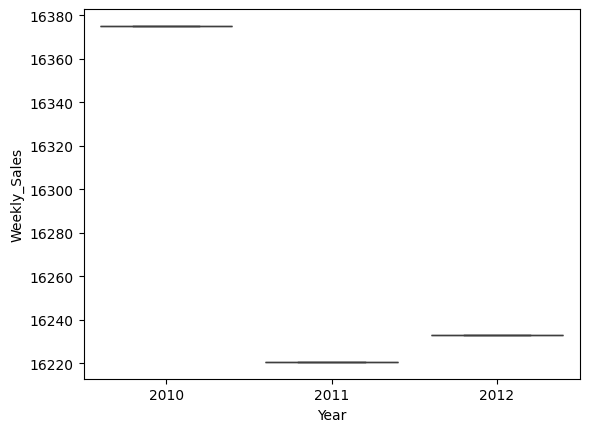

In [70]:
df_time_sales = pd.DataFrame({
    "Year": ["2010", "2011", "2012"],
    "Weekly_Sales": [df_time_2010, df_time_2011, df_time_2012]
})
sns.boxplot(data=df_time_sales, x="Year", y="Weekly_Sales")

تأثیر دما (Temperature) بر فروش

In [71]:
df_temp_group = pd.cut(df["Temperature"], [-2, 40, 70, 101], labels=["cold", "median", "hot"])
df_tem_Weekly_Sales = df.groupby(df_temp_group, observed=True)["Weekly_Sales"].sum()
print(df_tem_Weekly_Sales)

Temperature
cold       488,095,290
median   1,295,719,119
hot        924,040,699
Name: Weekly_Sales, dtype: float64


<Axes: xlabel='Temp', ylabel='Weekly_Sales'>

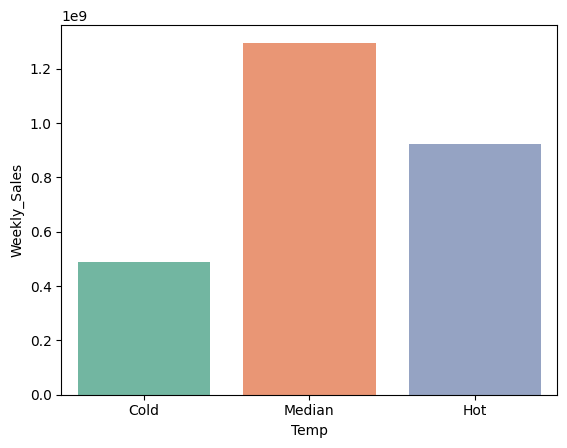

In [97]:
df_temp_sales = pd.DataFrame({
    "Temp": ["Cold", "Median", "Hot"],
    "Weekly_Sales": [df_tem_Weekly_Sales["cold"], df_tem_Weekly_Sales["median"], df_tem_Weekly_Sales["hot"]]
})
sns.barplot(data=df_temp_sales, x="Temp", y="Weekly_Sales", palette="Set2", hue="Temp")

تأثیر قیمت سوخت (Fuel_Price)

In [ ]:
fuel_corr = df["Fuel_Price"].corr(df["Weekly_Sales"])
print(fuel_corr)

0.006412907682481052


In [99]:
fuel_group = pd.cut(df["Fuel_Price"], [0, 3.2, 3.9, 5], labels=["Low", "Medium", "High"])
fuel_price_mean = df.groupby(fuel_group, observed=True)["Weekly_Sales"].mean().round(2)
print(f"mean {fuel_price_mean}")

mean Fuel_Price
Low      16,215
Medium   16,175
High     16,497
Name: Weekly_Sales, dtype: float64


In [100]:
fuel_price_median = df.groupby(fuel_group, observed=True)["Weekly_Sales"].median()
print(f"median {fuel_price_median}")

median Fuel_Price
Low      7,796
Medium   7,567
High     8,388
Name: Weekly_Sales, dtype: float64


<Axes: xlabel='Fuel', ylabel='Weekly_Sales'>

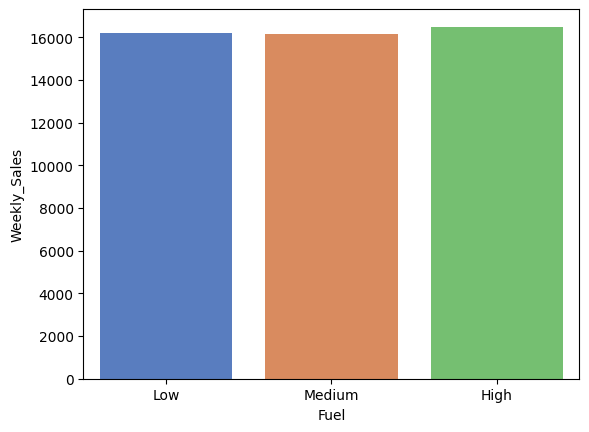

In [104]:
df_fuel_sales = pd.DataFrame({
    "Fuel": ["Low", "Medium", "High"],
    "Weekly_Sales": [fuel_price_mean["Low"], fuel_price_mean["Medium"], fuel_price_mean["High"]]
})
sns.barplot(data=df_fuel_sales, x="Fuel", y="Weekly_Sales", palette="muted", hue="Fuel")

مقایسه نوع فروشگاه (Type A / B / C)

In [76]:
df_type = df.groupby("Type")["Weekly_Sales"].mean().round(2)
print(df_type)

Type
A   20,443
B   12,340
C    9,765
Name: Weekly_Sales, dtype: float64


بررسی رابطه Size و Sales

In [105]:
size_corr = df["Size"].corr(df["Weekly_Sales"])
print(size_corr)


0.24714117436864305


<Axes: xlabel='Size', ylabel='Weekly_Sales'>

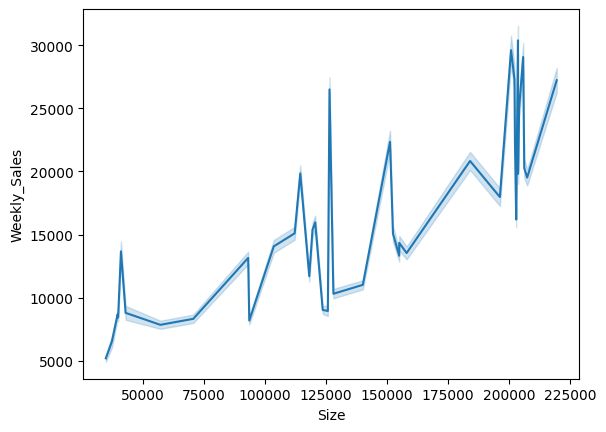

In [114]:
sns.lineplot(data=df, x="Size", y="Weekly_Sales")

In [116]:
Size_group = pd.cut(df["Size"], [30000, 75000, 150000, 250000], labels=["Small", "Medium", "Large"])
size_price_mean = df.groupby(Size_group, observed=True)["Weekly_Sales"].mean().round(2)
print(size_price_mean)

Size
Small     8,324
Medium   13,913
Large    21,260
Name: Weekly_Sales, dtype: float64


In [117]:
size_price_median = df.groupby(Size_group, observed=True)["Weekly_Sales"].median().round(2)
print(size_price_median)

Size
Small     2,441
Medium    7,599
Large    10,962
Name: Weekly_Sales, dtype: float64


<Axes: xlabel='Size', ylabel='Weekly_Sales'>

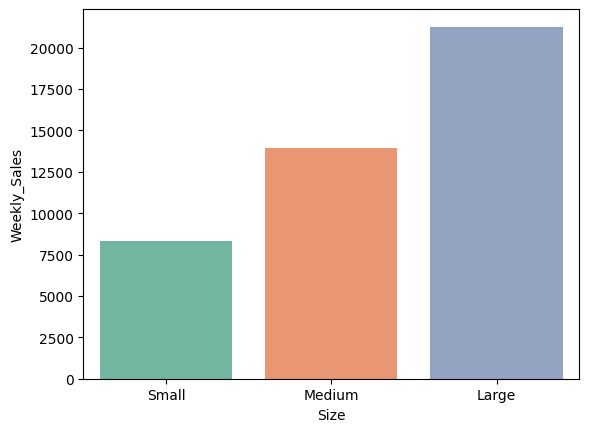

In [119]:
df_size_sales = pd.DataFrame({
    "Size": ["Small", "Medium", "Large"],
    "Weekly_Sales": [size_price_mean["Small"], size_price_mean["Medium"], size_price_mean["Large"]]
})
sns.barplot(data=df_size_sales, x="Size", y="Weekly_Sales", palette="Set2", hue="Size")

Conclusion

In this project, Walmart’s weekly sales data were analyzed after thorough data cleaning and preprocessing. The results indicate that managerial factors have a stronger impact on sales performance than environmental factors. Sales are generally higher during holiday weeks, although the magnitude of this increase varies across stores. Additionally, the analysis of discounts shows that higher MarkDown values do not necessarily lead to proportional sales growth, and some discount strategies provide better value for money.

The store size analysis reveals a positive but moderate relationship with weekly sales, with larger stores typically generating higher sales. In contrast, environmental variables such as temperature and fuel price exhibit a relatively weak influence. Overall, the findings suggest that well-designed managerial strategies—particularly in discount planning and store capacity management—play a more critical role in driving sales than external conditions.

نتیجه گیری

در این پروژه، داده‌های فروش هفتگی Walmart پس از پاک‌سازی و آماده‌سازی مورد تحلیل قرار گرفت. نتایج نشان داد که عوامل مدیریتی نسبت به عوامل محیطی تأثیر پررنگ‌تری بر میزان فروش دارند. فروش در هفته‌های تعطیل به‌طور میانگین بالاتر است، اما این افزایش در همه فروشگاه‌ها یکسان نیست. همچنین بررسی تخفیف‌ها نشان داد که افزایش مقدار تخفیف لزوماً منجر به افزایش متناسب فروش نمی‌شود و برخی سیاست‌های تخفیفی ارزش بیشتری از نظر بازدهی ایجاد می‌کنند.

تحلیل اندازه فروشگاه‌ها حاکی از وجود رابطه‌ای مثبت و در حد متوسط بین اندازه فروشگاه و فروش هفتگی است، به‌طوری‌که فروشگاه‌های بزرگ‌تر عموماً فروش بالاتری دارند. در مقابل، متغیرهای محیطی مانند دما و قیمت سوخت تأثیر ضعیف‌تری بر فروش نشان داده‌اند. به‌طور کلی، این نتایج نشان می‌دهد که تصمیمات مدیریتی هدفمند، به‌ویژه در زمینه تخفیف‌ها و تمرکز بر فروشگاه‌های با ظرفیت بالاتر، نقش کلیدی‌تری در افزایش فروش نسبت به عوامل بیرونی دارند.